## Import 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


## Notebook configuration

In [42]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Ensures all columns are visible
pd.set_option('display.max_columns', None)


In [43]:
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")

Analysis Date: 2026-02-10


## Load data

In [44]:
df = pd.read_csv("../data/luxury_cosmetics_fraud_analysis_2025.csv")
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2133, 16)


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Time,Customer_Age,Customer_Loyalty_Tier,Location,Store_ID,Product_SKU,Product_Category,Purchase_Amount,Payment_Method,Device_Type,IP_Address,Fraud_Flag,Footfall_Count
0,702bdd9b-9c93-41e3-9dbb-a849b2422080,119dca0b-8554-4b2d-9bec-e964eaf6af97,2025-07-27,04:04:15,56.0,Silver,San Francisco,FLAGSHIP-LA,NEBULA-SERUM-07,Concealer,158.24,Mobile Payment,Desktop,239.249.58.237,0,333
1,2e64c346-36bc-4acf-bc2b-8b0fdf46abc5,299df086-26c4-4708-b6d7-fcaeceb14637,2025-03-14,20:23:23,46.0,Platinum,Zurich,BOUTIQUE-SHANGHAI,STELLAR-FOUND-03,Lipstick,86.03,Credit Card,Tablet,84.49.227.90,0,406
2,29ad1278-70ce-421f-8d81-23816b39f4ac,dfa3d24d-b935-49a5-aa1d-7d57a44d8773,2025-02-20,12:36:02,32.0,Silver,Milan,POPUP-TOKYO,SOLAR-BLUSH-04,Mascara,255.69,Gift Card,Desktop,79.207.35.55,0,96
3,07dc4894-e0eb-48f1-99a7-1942b1973d9b,7a67e184-9369-49ee-aeac-18f5b51b230f,2025-04-25,19:09:43,60.0,Bronze,London,BOUTIQUE-NYC,GALAXIA-SET-08,Serum,282.76,Gift Card,Mobile,176.194.167.253,0,186
4,ae407054-5543-429c-918a-cdcc42ea9782,cf14730a-8f5a-453d-b527-39a278852b27,2025-04-17,14:23:23,NaN,Platinum,Miami,BOUTIQUE-NYC,LUNAR-MASC-02,Serum,205.86,Gift Card,Mobile,166.31.46.111,0,179


In [45]:
# Checkfor missing values
null_counts = df.isnull().sum()
print("Missing Values Per Column:\n", null_counts[null_counts > 0])

# Strategic Filling for EDA
df['Customer_Loyalty_Tier'] = df['Customer_Loyalty_Tier'].fillna('Unknown')
df['Payment_Method'] = df['Payment_Method'].fillna('Unknown')
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())

# Format Dates & Time
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Hour'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.hour

Missing Values Per Column:
 Customer_Age             106
Customer_Loyalty_Tier    106
Payment_Method           106
dtype: int64


## Class Imbalance

In [46]:
fraud_count = df['Fraud_Flag'].value_counts()
fraud_pct = df['Fraud_Flag'].value_counts(normalize=True) * 100

print("=" * 50)
print("FRAUD STATISTICS")
print("=" * 50)
print(f"Total Transactions: {len(df):,}")
print(f"Legitimate: {fraud_count[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fraudulent: {fraud_count[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"Fraud Rate: 1 in {int(1/fraud_pct[1]*100)} transactions")
print("=" * 50)


FRAUD STATISTICS
Total Transactions: 2,133
Legitimate: 2,067 (96.91%)
Fraudulent: 66 (3.09%)
Fraud Rate: 1 in 32 transactions


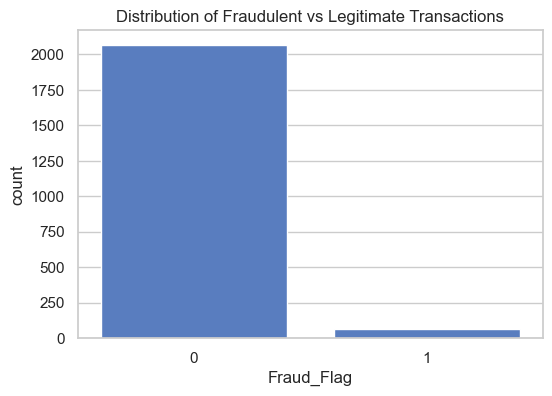

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_Flag', data=df)
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.show()


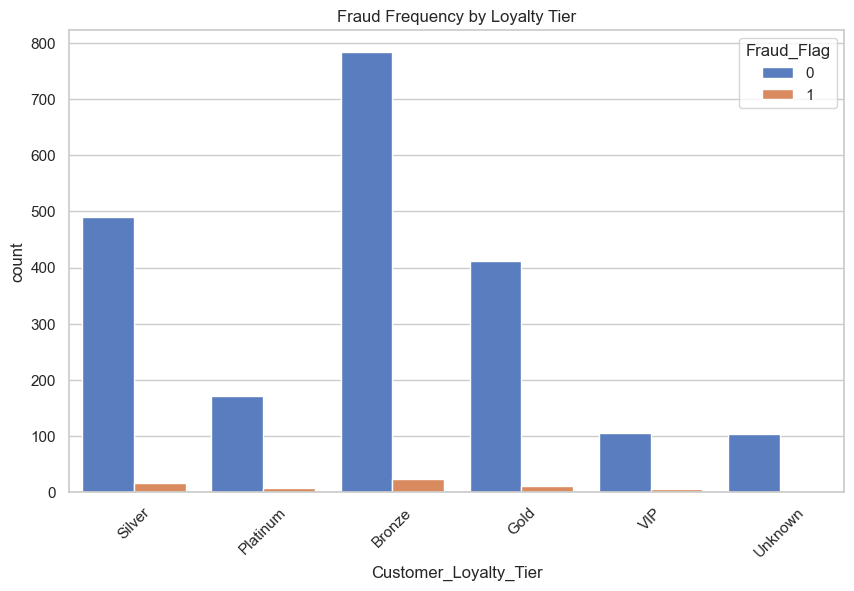

In [48]:
# Fraud frequency based on loyalty tier
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Loyalty_Tier', hue='Fraud_Flag', data=df)
plt.title('Fraud Frequency by Loyalty Tier')
plt.xticks(rotation=45)
plt.show()

## Transaction Volume by Hour

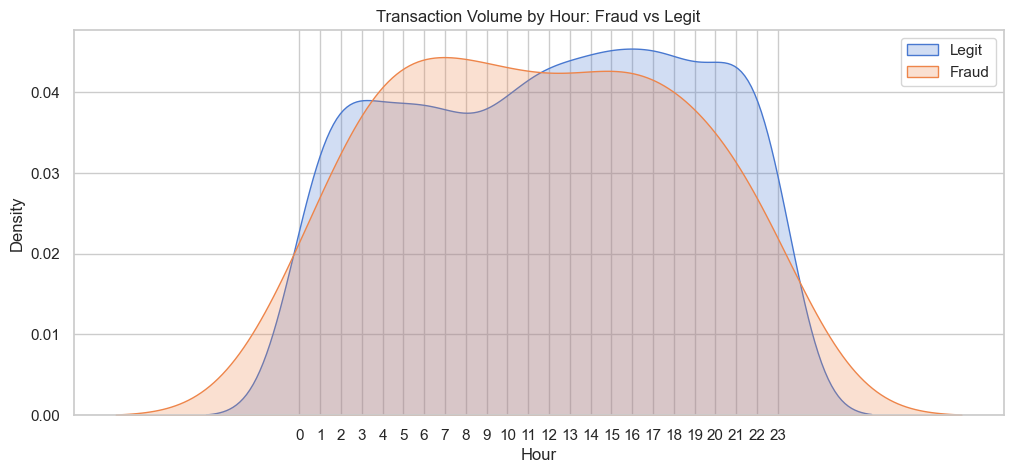

In [49]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df[df['Fraud_Flag'] == 0], x='Hour', label='Legit', shade=True)
sns.kdeplot(data=df[df['Fraud_Flag'] == 1], x='Hour', label='Fraud', shade=True)
plt.title('Transaction Volume by Hour: Fraud vs Legit')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

## Correlation Heatmap

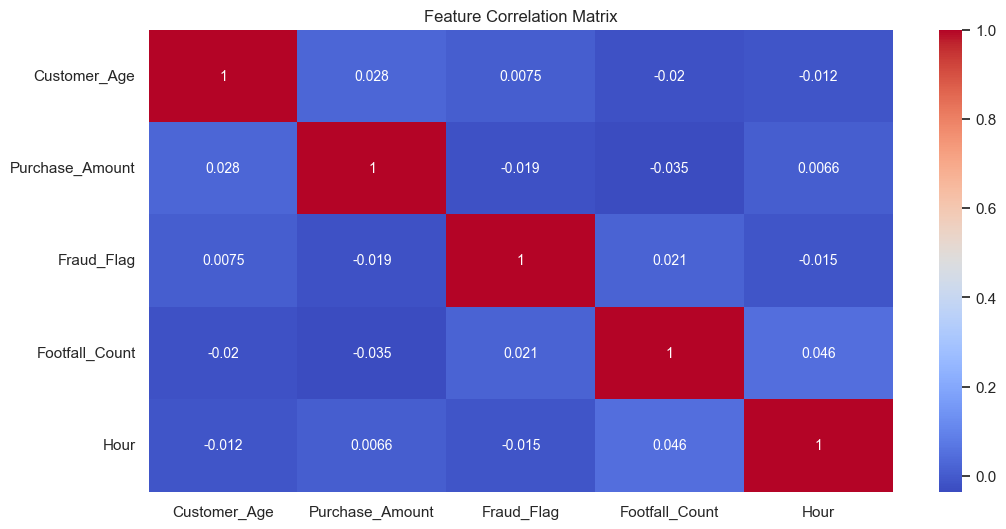

In [50]:
#only numeric columns
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Purchase Amount vs. Loyalty Tier

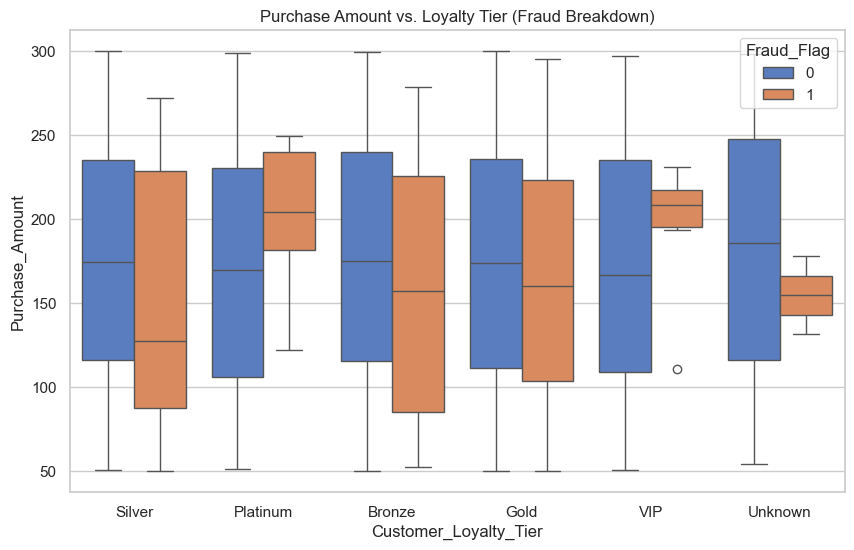

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Loyalty_Tier', y='Purchase_Amount', hue='Fraud_Flag', data=df)
plt.title('Purchase Amount vs. Loyalty Tier (Fraud Breakdown)')
plt.show()